In [2]:
import pandas as pd
import wandb

import seaborn as sns

In [3]:
df = pd.read_csv('../data/treesXYZ/meta/META.csv')

In [4]:
sp = 'DEAD'
print(df[(df['sp']==sp) & (df['multistem']==1)].shape[0])
print(df[(df['sp']==sp) & (df['dead']==1)].shape[0])
print(df[(df['sp']==sp) & (df['out_of_bounds']==0)].shape[0])

0
1
0


In [5]:
wandb.login()

wandb: Currently logged in as: mja2106 (use `wandb login --relogin` to force relogin)


True

In [43]:
def get_metrics_from_wandb(run_id):
    api = wandb.Api()
    run = api.run(f"mja2106/laser-trees/{run_id}")
    
    for x in run.config:
        print(f"{x}: {run.config[x]}")
        
    print("  ")
    
    best_accuracy = run.history()["Validation Accuracy"].max()
    converged_accuracy = run.history()["Validation Accuracy"].values[-1]
    print(f"Best validation accuracy: {best_accuracy}")
    print(f"Converged accuracy: {converged_accuracy}")
          
    min_prod_acc = run.history()[["PINNIG Accuracy", "PINPIN Accuracy", "QUEFAG Accuracy", "PINSYL Accuracy"]].min(axis=1)
    best_min_prod_acc = min_prod_acc.max()
    print(f"Best minimum producer accuracy: {best_min_prod_acc}")
    
    
    return run

In [226]:
run = get_metrics_from_wandb("3q95jgy7")

f: 1
model: SimpleView
epochs: 300
voting: None
loss_fn: cross-entropy
species: ['QUEFAG', 'PINNIG', 'QUEILE', 'PINSYL', 'PINPIN']
momentum: 0.9
image_dim: 256
num_views: 6
optimizer: adam
batch_size: 128
jitter_std: 0.003
soft_min_k: 50
transforms: ['rotation', 'translation', 'jitter']
camera_dist: 1.4
random_seed: 0
dataset_type: utils.dataset.TreeSpeciesPointDataset
max_rotation: 6.283185307179586
min_rotation: 0
learning_rate: [0.0005, 100, 0.5]
train_sampler: balanced
camera_fov_deg: 90
data_resolution: 2.5cm
depth_averaging: min
max_translation: 0.5
min_translation: 0
shuffle_dataset: True
validation_split: 0.2
  
Best validation accuracy: 0.7777777777777778
Converged accuracy: 0.7090909090909091
Best minimum producer accuracy: 0.5581395348837209


<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>


Text(0.5, 1.0, 'Best Accuracy Metrics vs. $T$')

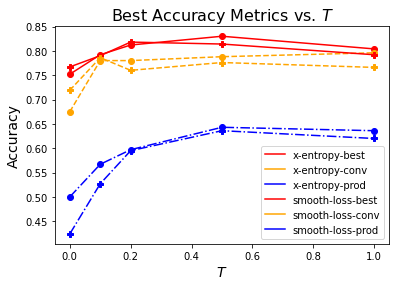

In [218]:
#Translation
T = [0, 0.1, 0.2, 0.5, 1]

table_data = {}
table_data["x-entropy"] = [0.752, 0.675, 0.500, 0.792, 0.780, 0.567, 0.812, 0.780, 0.597, 0.830, 0.788, 0.643, 0.804, 0.796, 0.636]
table_data["smooth-loss"] = [0.767, 0.719, 0.424, 0.790, 0.786, 0.527, 0.818, 0.760, 0.595, 0.814, 0.776, 0.636, 0.792, 0.766, 0.620]


for loss_fn in ["x-entropy","smooth-loss"]:
    for i, metric in enumerate(["best","conv","prod"]):
        key = f"{loss_fn}-{metric}"
        translation_data[key] = table_data[loss_fn][i::3]

df = pd.DataFrame.from_dict(translation_data)

df = df.set_index("T")

markers=['o','o','o','P','P','P']
hue=['r','orange','b','r','orange','b']
linestyles=['-','--','-.','-','--','-.']

ax = df.plot(color=hue)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(linestyles[i])
    print(type(line))
    
axFont = 14 
tFont = 16
ax.set_ylabel('Accuracy', size=axFont)
ax.set_xlabel('$T$', size=axFont)
ax.set_title('Best Accuracy Metrics vs. $T$', size=tFont)